In [ ]:
!pip install MTCNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.7 MB/s eta 0:00:00


Shape of image/array: (2608, 4624, 3)


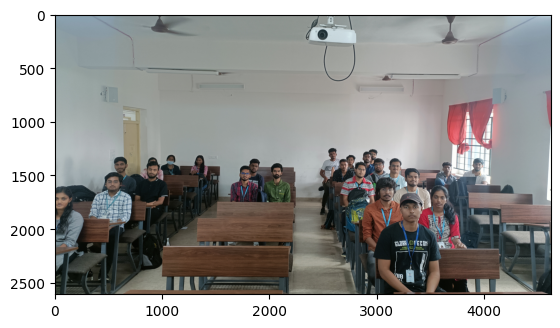

In [ ]:
import matplotlib.pyplot as plt
import mtcnn

# load image from file
filename = "./TARP-Class-Image.jpg"
classIMG = plt.imread(filename)
print("Shape of image/array:",classIMG.shape)
imgplot = plt.imshow(classIMG)
plt.show()

7/7 [==============================] - 0s 3ms/step
[{'box': [3274, 1477, 97, 115], 'confidence': 0.9999998807907104, 'keypoints': {'left_eye': (3308, 1517), 'right_eye': (3357, 1520), 'nose': (3336, 1538), 'mouth_left': (3309, 1562), 'mouth_right': (3351, 1565)}}, {'box': [482, 1513, 112, 132], 'confidence': 0.9999997615814209, 'keypoints': {'left_eye': (513, 1565), 'right_eye': (564, 1564), 'nose': (535, 1588), 'mouth_left': (514, 1613), 'mouth_right': (558, 1613)}}, {'box': [3222, 1732, 174, 206], 'confidence': 0.9999996423721313, 'keypoints': {'left_eye': (3274, 1802), 'right_eye': (3354, 1799), 'nose': (3320, 1842), 'mouth_left': (3286, 1888), 'mouth_right': (3348, 1886)}}, {'box': [2809, 1413, 78, 104], 'confidence': 0.9999994039535522, 'keypoints': {'left_eye': (2837, 1448), 'right_eye': (2871, 1454), 'nose': (2855, 1468), 'mouth_left': (2833, 1486), 'mouth_right': (2863, 1491)}}, {'box': [1815, 1384, 72, 91], 'confidence': 0.9999985694885254, 'keypoints': {'left_eye': (1841, 141

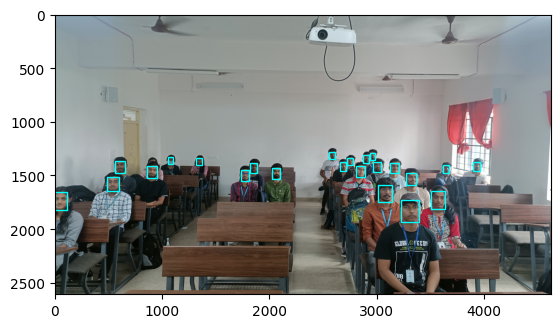

In [ ]:
# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
    # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='cyan', linewidth = 1)
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

# detector is defined above, otherwise uncomment
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(classIMG)

# for face in faces:
#   print(face["confidence"])

print(faces)
# display faces on the original image
draw_facebox(filename, faces)

In [ ]:
import cv2 as cv
import numpy as np

face_locs = [] # position of face
test_images = np.array([]) # encodings of face
for face in faces:
  x, y, w, h = face['box']
  # face_locs.append((x,y,w,h))
  img = cv.resize(classIMG[y:y+h, x:x+w], (400, 400))
  kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
  img = cv2.filter2D(img, -1, kernel)
  test_images = np.append(test_images, np.array(img))
  imgplot = plt.imshow(img)
  plt.show()

numberOfTestImages = len(faces)
test_images = test_images.reshape(numberOfTestImages, 400, 400, 3)
print(test_images.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Reading the training images

In [ ]:
# reading training images
import os
import cv2
import numpy as np

training_images_path = 'Train'
train_images = np.array([])
train_images_labels = []
for file in os.listdir(training_images_path):
  if file == ".ipynb_checkpoints":
    continue
  img = cv2.imread(training_images_path + "/" + file)
  img = cv2.resize(img, (400, 400))
  # print(img.shape)
  train_images = np.append(train_images, np.array(img))
  train_images_labels.append(file.split(".")[0])

train_images = train_images.reshape(len(train_images_labels), 400, 400, 3)
print(train_images.shape)

(14, 400, 400, 3)


In [ ]:
print(train_images_labels)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labelEncoded_train_image_labels = le.fit_transform(train_images_labels)
print(labelEncoded_train_image_labels)

['MAHI_MAANAS_REDDY', 'DESHARAJU_SAI_ABHISHEK', 'ATHUL_RAVI', 'SANJIL_KC', 'YASH_SETH', 'ADITHYA_DILEEP_M', 'MOHAMED_ASHRAF_ALI', 'VINAY_VITTAL_MOOLYA', 'KAUSHIK_K', 'LENIN_VASAN_V_R', 'GOPI_S', 'VAIBHAV_THALANKI', 'RAJAT_MISHRA', 'KONDREDDY_GOUTHAMI']
[ 7  2  1 10 13  0  8 12  4  6  3 11  9  5]


Creating the sequential model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation = "relu", input_shape = (400, 400, 3)),
    Conv2D(32, (3,3), activation = "relu"),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = "relu"),
    Conv2D(32, (3,3), activation = "relu"),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = "relu"),
    Conv2D(32, (3,3), activation = "relu"),
    MaxPooling2D((2,2)),

    # Conv2D(32, (3,3), activation = "relu"),
    # Conv2D(32, (3,3), activation = "relu"),
    # MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = "relu"),
    Dense(len(labelEncoded_train_image_labels), activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 398, 398, 32)      896       
                                                                 
 conv2d_45 (Conv2D)          (None, 396, 396, 32)      9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 198, 198, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 196, 196, 32)      9248      
                                                                 
 conv2d_47 (Conv2D)          (None, 194, 194, 32)      9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 97, 97, 32)       0         
 g2D)                                                 

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [ ]:
model.fit(train_images, labelEncoded_train_image_labels, epochs = 10, batch_size = 4)

Epoch 1/10
4/4 [==============================] - 3s 44ms/step - loss: 105.6202 - accuracy: 0.1429
Epoch 2/10
4/4 [==============================] - 0s 34ms/step - loss: 16.1305 - accuracy: 0.0714
Epoch 3/10
4/4 [==============================] - 0s 31ms/step - loss: 3.0486 - accuracy: 0.2143
Epoch 4/10
4/4 [==============================] - 0s 29ms/step - loss: 2.3448 - accuracy: 0.2857
Epoch 5/10
4/4 [==============================] - 0s 30ms/step - loss: 2.2316 - accuracy: 0.3571
Epoch 6/10
4/4 [==============================] - 0s 30ms/step - loss: 1.8442 - accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 30ms/step - loss: 1.1475 - accuracy: 0.7143
Epoch 8/10
4/4 [==============================] - 0s 31ms/step - loss: 0.4458 - accuracy: 0.9286
Epoch 9/10
4/4 [==============================] - 0s 30ms/step - loss: 0.6976 - accuracy: 0.8571
Epoch 10/10
4/4 [==============================] - 0s 30ms/step - loss: 0.2478 - accuracy: 1.0000


In [ ]:
# import matplotlib.pyplot as plt
# testing_images_path = "Test"
# test_images = np.array([])
# test_images_labels = []
# for file in os.listdir(testing_images):
#   # print(file)
#   img = cv2.imread(testing_images_path + "/" + file)
#   img = cv2.resize(img, (512, 512))
#   plt.imshow(img)
#   # print(img.shape)
#   test_images = np.append(test_images, np.array(img))
#   test_images_labels.append(file.split("-")[1].split(".")[0])

# test_images = test_images.reshape(len(test_images_labels), 512, 512, 3)
# # print(test_images.shape)
# print(test_images_labels)

In [ ]:
pred_name = model.predict(test_images)
print(pred_name)
for i in range(0, len(test_images)):
  print(le.inverse_transform([list(pred_name[i]).index(max(pred_name[i]))]))

1/1 [==============================] - 0s 179ms/step
[[0.02775392 0.03156611 0.11317599 0.11113331 0.03891031 0.10246075
  0.0285001  0.07175975 0.00181152 0.00301847 0.0739665  0.08089694
  0.24595782 0.06908856]
 [0.03203857 0.04481125 0.10370415 0.13048336 0.04997458 0.09927449
  0.04464363 0.09797667 0.00676972 0.00972963 0.06694341 0.07185565
  0.18211903 0.05967583]
 [0.01161734 0.01578387 0.0795457  0.3479429  0.01869123 0.0381435
  0.08286499 0.19020136 0.00073447 0.00217771 0.03553785 0.01409311
  0.14743188 0.01523413]
 [0.02674357 0.03783157 0.12265245 0.11237038 0.03823973 0.08070883
  0.02637667 0.10325533 0.00185815 0.00551093 0.072432   0.05210407
  0.26251456 0.05740177]
 [0.03385409 0.04171998 0.14285836 0.09409843 0.04573494 0.08643068
  0.02616582 0.09819587 0.00192863 0.00769449 0.07167086 0.08154064
  0.22661085 0.04149634]
 [0.05391882 0.04978787 0.12943648 0.10169356 0.05197443 0.07826695
  0.04931284 0.09640543 0.00808283 0.01809989 0.06947169 0.07920656
  0.158